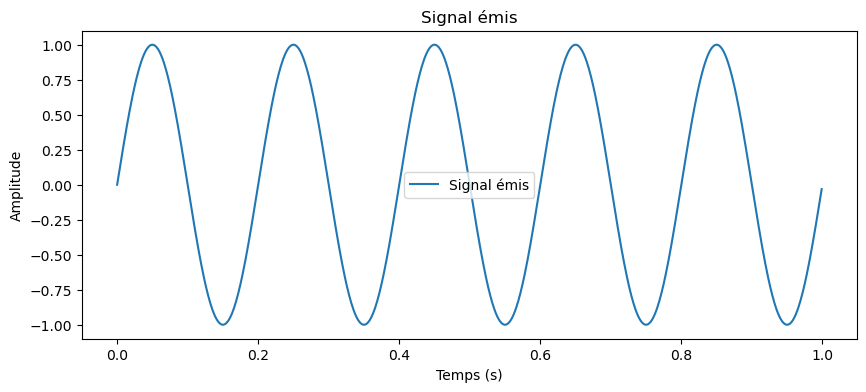

In [64]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000  
f0 = 5    
A = 1     
t = np.arange(0, 1, 1/fs)  # Durée de 0 à 1 seconde
signal_emis = A * np.sin(2 * np.pi * f0 * t)

plt.figure(figsize=(10, 4))
plt.plot(t, signal_emis, label='Signal émis')
plt.title("Signal émis")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

#2
n_paths = 6
retards = np.random.randint(0, 40, n_paths)  # Retards aléatoires en nombre d'échantillons (max 50)  # Retards aléatoires en nombre d'échantillons
amplitudes = np.random.uniform(0.1, 1, n_paths)  # Amplitudes aléatoires entre 0.1 et 1

signal_recu = np.zeros_like(signal_emis)
for i in range(n_paths):
    retard = retards[i]  # Retard en échantillons
    signal_retarde = np.zeros_like(signal_emis)
    signal_retarde[retard:] = amplitudes[i] * signal_emis[:-retard]  # Décalage
    signal_recu += signal_retarde

In [65]:
signal_recu += signal_emis  

In [72]:
puissance_signal = np.mean(signal_emis**2)
puissance_bruit = puissance_signal / (10**(30/10))  # SNR = 30 dB
bruit = np.random.normal(0, np.sqrt(puissance_bruit), len(signal_emis))  # Bruit avec écart-type de 0.1
signal_recu += bruit

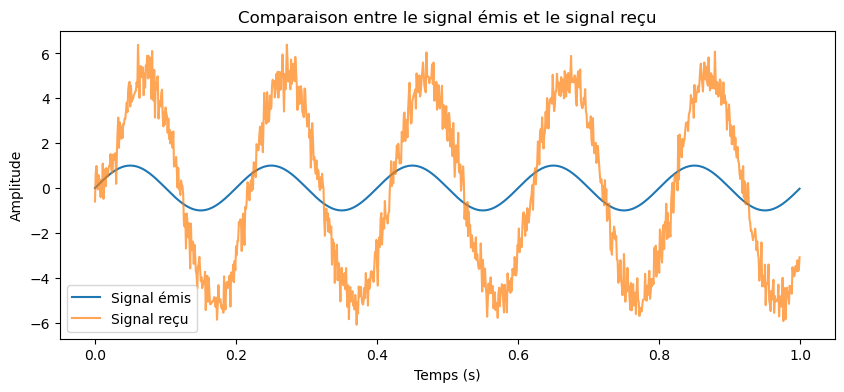

Puissance du signal reçu : 12.9733


In [73]:

plt.figure(figsize=(10, 4))
plt.plot(t, signal_emis, label='Signal émis')
plt.plot(t, signal_recu, label='Signal reçu', alpha=0.7)
plt.title("Comparaison entre le signal émis et le signal reçu")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# 6. Calcul et affichage de la puissance du signal reçu
puissance_signal_recu = np.mean(signal_recu**2)
print(f"Puissance du signal reçu : {puissance_signal_recu:.4f}")

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

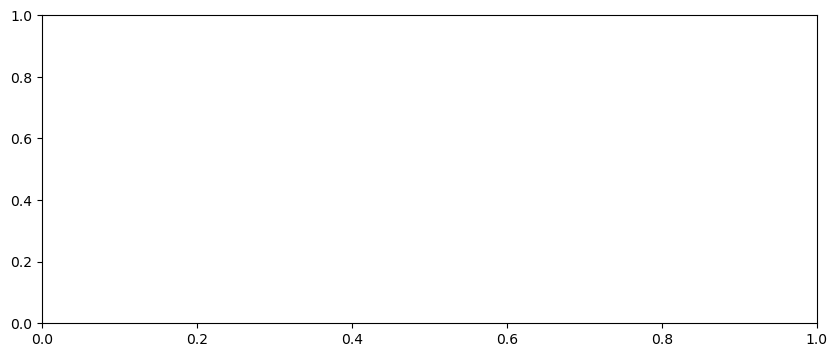

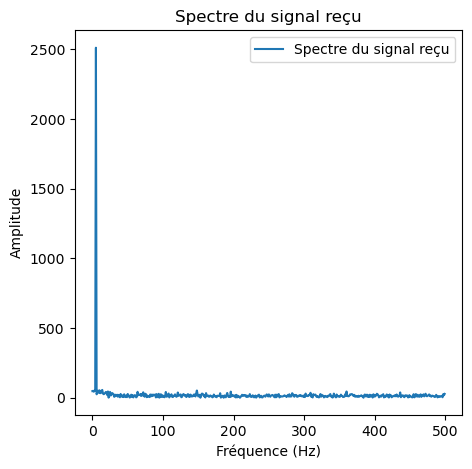

In [79]:
freqs = np.fft.fftfreq(len(signal_recu), 1/fs)
spectrum = np.fft.fft(signal_recu)
plt.figure(figsize=(5, 5))
plt.plot(freqs[:len(freqs)//2], np.abs(spectrum[:len(spectrum)//2]), label='Spectre du signal reçu')
plt.title("Spectre du signal reçu")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
puissance_signal_recu = np.mean(signal_recu**2)


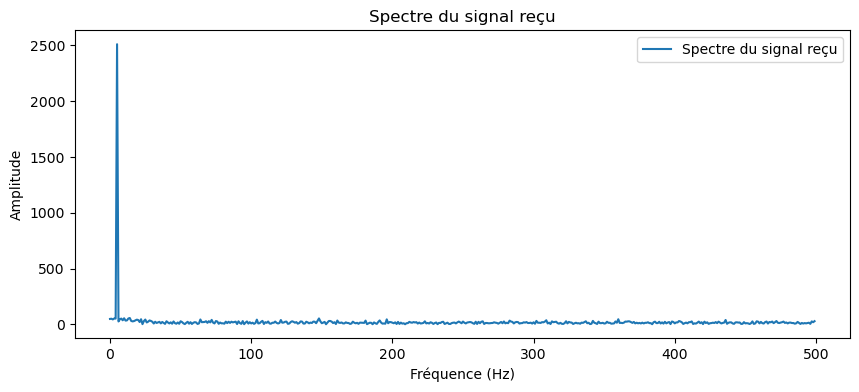

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

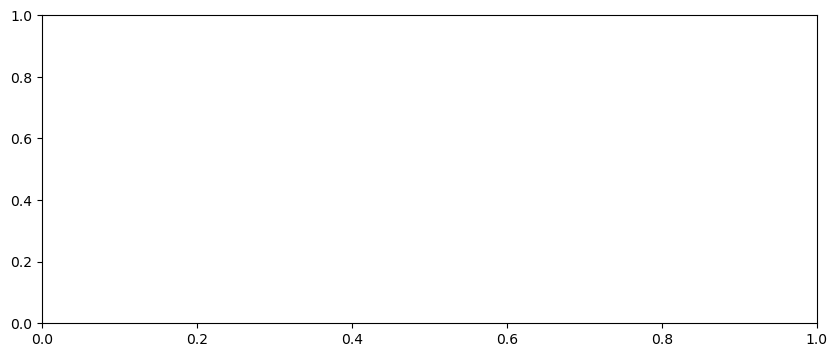

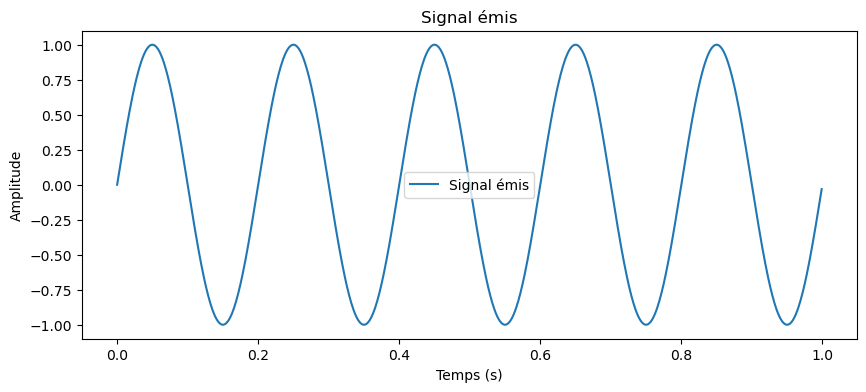

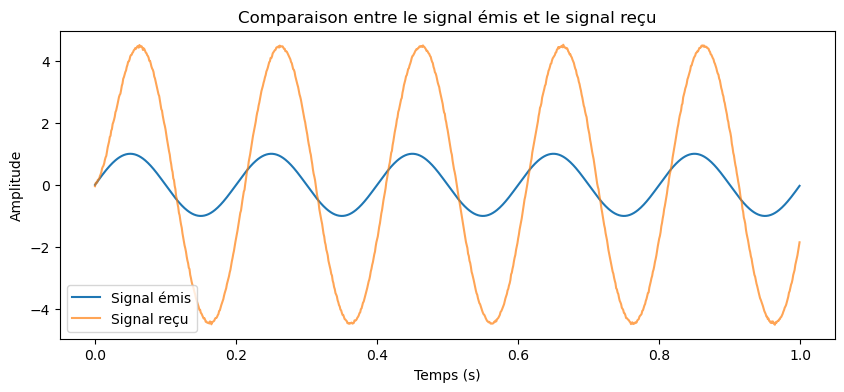

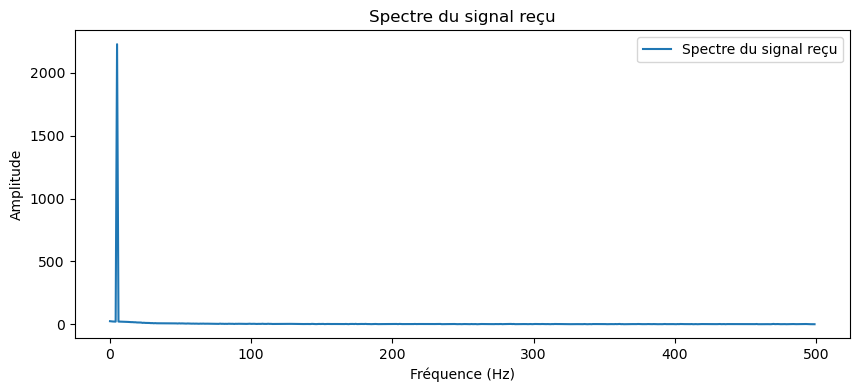

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

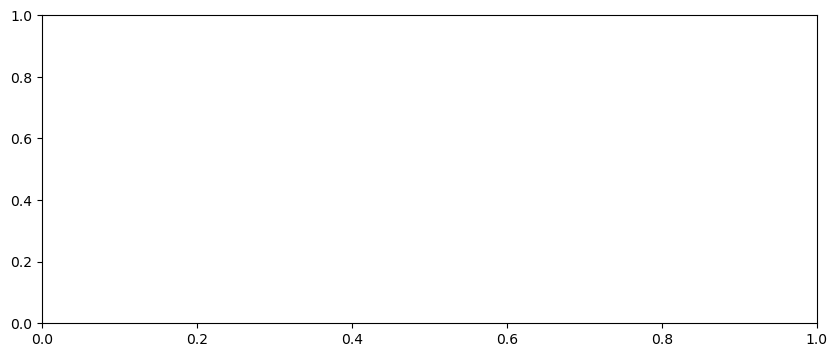

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Définition du signal émis
fs = 1000  # Fréquence d'échantillonnage (Hz)
f0 = 5     # Fréquence porteuse (Hz)
A = 1      # Amplitude
t = np.arange(0, 1, 1/fs)  # Durée de 0 à 1 seconde
signal_emis = A * np.sin(2 * np.pi * f0 * t)

plt.figure(figsize=(10, 4))
plt.plot(t, signal_emis, label='Signal émis')
plt.title("Signal émis")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# 2. Simulation des trajets multiples
n_paths = 6
retards = np.random.randint(0, 50, n_paths)  # Retards aléatoires en nombre d'échantillons (max 50)  # Retards aléatoires en nombre d'échantillons
amplitudes = np.random.uniform(0.1, 1, n_paths)  # Amplitudes aléatoires entre 0.1 et 1

signal_recu = np.zeros_like(signal_emis)
for i in range(n_paths):
    retard = retards[i]  # Retard en échantillons
    signal_retarde = np.zeros_like(signal_emis)
    signal_retarde[retard:] = amplitudes[i] * signal_emis[:-retard]  # Décalage
    signal_recu += signal_retarde

# 3. Ajouter les signaux décalés au signal reçu
signal_recu += signal_emis  # Ajouter le signal direct

# 4. Ajouter du bruit blanc gaussien avec un SNR de 30 dB
puissance_signal = np.mean(signal_emis**2)
puissance_bruit = puissance_signal / (10**(30/10))  # SNR = 30 dB
bruit = np.random.normal(0, np.sqrt(puissance_bruit), len(signal_emis))  # Bruit avec écart-type de 0.1
signal_recu += bruit

# 5. Affichage des signaux
plt.figure(figsize=(10, 4))
plt.plot(t, signal_emis, label='Signal émis')
plt.plot(t, signal_recu, label='Signal reçu', alpha=0.7)
plt.title("Comparaison entre le signal émis et le signal reçu")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# 6. Calcul et affichage de la puissance du signal reçu

# 7. Affichage du spectre du signal reçu
freqs = np.fft.fftfreq(len(signal_recu), 1/fs)
spectrum = np.fft.fft(signal_recu)
plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(freqs)//2], np.abs(spectrum[:len(spectrum)//2]), label='Spectre du signal reçu')
plt.title("Spectre du signal reçu")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
puissance_signal_recu = 10 * np.log10(np.mean(signal_recu**2))

plt.figure(figsize=(10, 4))
plt.plot(t, np.linalg.norm(signal_recu)**2, label='Puissance du signal reçu')
plt.title("Puissance du signal reçu en fonction du temps")
plt.xlabel("Temps (s)")
plt.ylabel("Puissance (dB)")
plt.legend()
plt.show()

print(f"Puissance du signal reçu (dB) : {puissance_signal_recu:.4f}")
